In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import glob
import os
import pickle
import random
import sys

import ivac
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import prettypyplot as pplt
import scipy
import seaborn as sns
from matplotlib import ticker
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors

import extq

In [ ]:
! source /project/dinner/scguo/upside2/sourceme.sh

In [ ]:
# upside_path = os.environ["UPSIDE_HOME"]
upside_path = "/project/dinner/scguo/upside2/"
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

In [ ]:
plt.style.use("custom")  # custom style sheet
plt.style.use("vibrant")  # muted color theme from SciencePlots
pplt.load_cmaps()

In [ ]:
plt.rcParams['text.latex.preamble'] = r'\usepackage{siunitx}\sisetup{detect-all}\usepackage{helvet}\usepackage{sansmath}\sansmath'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'cm'

# Load data

In [10]:
home_dir = "/project/dinner/scguo/kaiB"
base_dir = "/project/dinner/scguo/kaiB/dga/new_87"

In [130]:
def find_missing_omega(base_dir):
    trajfiles = []
    for i in range(1, 12289):
        j = i // 1000
        for iso in ("cis", "trans"):
            head = f"{base_dir}/{j:02}/{i:05}/outputs/{i:05}_{iso}"
            if len(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up")) > 0:
                if not os.path.exists(f"{head}_Omega.npy"):
                    print(head)
                else:
                    trajfiles.extend(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up"))
    return trajfiles

In [131]:
trajfiles = find_missing_omega(base_dir)

In [125]:
def find_missing(base_dir):
    trajfiles = []
    for i in range(1, 12289):
        j = i // 1000
        for iso in ("cis", "trans"):
            head = f"{base_dir}/{j:02}/{i:05}/outputs/{i:05}_{iso}"
            if len(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up")) > 0:
                if not os.path.exists(f"{head}_fs_qtots.pkl"):
                    # print(os.listdir(f"{base_dir}/{j:02}/{i:05}/{iso}"))
                    print(head)
                else:
                    trajfiles.extend(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up"))
    return trajfiles

In [126]:
trajfiles = find_missing(base_dir)

In [127]:
len(trajfiles)

22826

In [135]:
def find_missing_qtots(base_dir):
    trajfiles = []
    for i in range(1, 12289):
        j = i // 1000
        for iso in ("cis", "trans"):
            head = f"{base_dir}/{j:02}/{i:05}/outputs/{i:05}_{iso}"
            if len(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up")) > 0:
                if not os.path.exists(f"{head}_q_gs.pkl"):
                    # print(os.listdir(f"{base_dir}/{j:02}/{i:05}/{iso}"))
                    print(head)
                else:
                    trajfiles.extend(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up"))
    return trajfiles

In [136]:
trajfiles = find_missing_qtots(base_dir)

/project/dinner/scguo/kaiB/dga/new_87/00/00513/outputs/00513_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00513/outputs/00513_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00514/outputs/00514_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00514/outputs/00514_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00515/outputs/00515_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00516/outputs/00516_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00516/outputs/00516_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00517/outputs/00517_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00517/outputs/00517_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00518/outputs/00518_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00518/outputs/00518_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00519/outputs/00519_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00519/outputs/00519_trans
/project/dinner/scguo/kaiB/dga/new_87/00/00520/outputs/00520_cis
/project/dinner/scguo/kaiB/dga/new_87/00/00520/outputs/00520_trans
/project/

In [138]:
trajfiles = find_missing_qtots(f"{home_dir}/dga/new_89")

/project/dinner/scguo/kaiB/dga/new_89/02/02327/outputs/02327_trans
/project/dinner/scguo/kaiB/dga/new_89/02/02382/outputs/02382_cis
/project/dinner/scguo/kaiB/dga/new_89/02/02584/outputs/02584_cis
/project/dinner/scguo/kaiB/dga/new_89/02/02596/outputs/02596_trans
/project/dinner/scguo/kaiB/dga/new_89/03/03314/outputs/03314_cis
/project/dinner/scguo/kaiB/dga/new_89/03/03325/outputs/03325_cis
/project/dinner/scguo/kaiB/dga/new_89/04/04622/outputs/04622_trans
/project/dinner/scguo/kaiB/dga/new_89/10/10233/outputs/10233_cis
/project/dinner/scguo/kaiB/dga/new_89/10/10233/outputs/10233_trans
/project/dinner/scguo/kaiB/dga/new_89/10/10234/outputs/10234_cis
/project/dinner/scguo/kaiB/dga/new_89/10/10234/outputs/10234_trans
/project/dinner/scguo/kaiB/dga/new_89/10/10235/outputs/10235_cis
/project/dinner/scguo/kaiB/dga/new_89/10/10235/outputs/10235_trans
/project/dinner/scguo/kaiB/dga/new_89/10/10236/outputs/10236_cis
/project/dinner/scguo/kaiB/dga/new_89/10/10236/outputs/10236_trans
/project/di

# loading

In [62]:
def load_cvs(base_dir):
    fs_qtots, f_rmsds, p_rmsds, r_rmsds, omegas = [], [], [], [], []
    for i in range(1, 12289):
        j = i // 1000
        for iso in ("cis", "trans"):
            head = f"{base_dir}/{j:02}/{i:05}/outputs/{i:05}_{iso}"
            if len(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up")) == 0:
                continue
            fs_qtots.extend(np.load(f"{head}_fs_qtots.pkl", allow_pickle=True))
            f_rmsds.extend(np.load(f"{head}_f_rmsds.pkl", allow_pickle=True))
            p_rmsds.extend(np.load(f"{head}_p_rmsds.pkl", allow_pickle=True))
            r_rmsds.extend(np.load(f"{head}_r_rmsds.pkl", allow_pickle=True))
            omegas.append(np.load(f"{head}_Omega.npy"))
    return np.array(fs_qtots), np.array(f_rmsds), np.array(p_rmsds), np.array(r_rmsds), np.array(omegas)

In [69]:
fs_qtots, f_rmsds, p_rmsds, r_rmsds, omegas = load_cvs(base_dir)

In [118]:
fs_qtots.shape

(23138, 6, 1001)

In [80]:
# save into blocks of 2000 trajectories (1000 cis/trans)
def save_blocks(arrays, basename, block_size=2000):
    n_blocks = len(arrays) // block_size + 1
    for i in range(n_blocks):
        if i != n_blocks - 1:
            block = arrays[i * block_size : (i + 1) * block_size]
        else:
            block = arrays[i * block_size :]
        print(block.shape, i)
        np.save(f"{basename}_{i:02}.npy", block)

In [81]:
save_blocks(fs_qtots, "/project/dinner/scguo/kaiB/dga/new_87/fs_qtots")

(2000, 6, 1001) 0
(2000, 6, 1001) 1
(2000, 6, 1001) 2
(2000, 6, 1001) 3
(2000, 6, 1001) 4
(2000, 6, 1001) 5
(2000, 6, 1001) 6
(2000, 6, 1001) 7
(2000, 6, 1001) 8
(2000, 6, 1001) 9
(2000, 6, 1001) 10
(1138, 6, 1001) 11


In [82]:
save_blocks(f_rmsds, "/project/dinner/scguo/kaiB/dga/new_87/f_rmsds")
save_blocks(p_rmsds, "/project/dinner/scguo/kaiB/dga/new_87/p_rmsds")
save_blocks(r_rmsds, "/project/dinner/scguo/kaiB/dga/new_87/r_rmsds")

(2000, 1001) 0
(2000, 1001) 1
(2000, 1001) 2
(2000, 1001) 3
(2000, 1001) 4
(2000, 1001) 5
(2000, 1001) 6
(2000, 1001) 7
(2000, 1001) 8
(2000, 1001) 9
(2000, 1001) 10
(1138, 1001) 11
(2000, 1001) 0
(2000, 1001) 1
(2000, 1001) 2
(2000, 1001) 3
(2000, 1001) 4
(2000, 1001) 5
(2000, 1001) 6
(2000, 1001) 7
(2000, 1001) 8
(2000, 1001) 9
(2000, 1001) 10
(1138, 1001) 11
(2000, 1001) 0
(2000, 1001) 1
(2000, 1001) 2
(2000, 1001) 3
(2000, 1001) 4
(2000, 1001) 5
(2000, 1001) 6
(2000, 1001) 7
(2000, 1001) 8
(2000, 1001) 9
(2000, 1001) 10
(1138, 1001) 11


In [83]:
save_blocks(omegas, "/project/dinner/scguo/kaiB/dga/new_87/data/omegas")

(2000, 1001, 7) 0
(2000, 1001, 7) 1
(2000, 1001, 7) 2
(2000, 1001, 7) 3
(2000, 1001, 7) 4
(2000, 1001, 7) 5
(2000, 1001, 7) 6
(2000, 1001, 7) 7
(2000, 1001, 7) 8
(2000, 1001, 7) 9
(2000, 1001, 7) 10
(826, 1001, 7) 11


In [133]:
def load_qfracs(base_dir):
    q_gs_all, q_gs, q_fs_all, q_fs, q_core = [], [], [], [], []
    for i in range(1, 12289):
        j = i // 1000
        for iso in ("cis", "trans"):
            head = f"{base_dir}/{j:02}/{i:05}/outputs/{i:05}_{iso}"
            if len(glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up")) == 0:
                continue
            q_gs_all.extend(np.load(f"{head}_q_gs_all.pkl", allow_pickle=True))
            q_gs.extend(np.load(f"{head}_q_gs.pkl", allow_pickle=True))
            q_fs_all.extend(np.load(f"{head}_q_fs_all.pkl", allow_pickle=True))
            q_fs.extend(np.load(f"{head}_q_fs.pkl", allow_pickle=True))
            q_core.extend(np.load(f"{head}_q_core.pkl", allow_pickle=True))
    return np.array(q_gs_all), np.array(q_gs), np.array(q_fs_all), np.array(q_fs), np.array(q_core)

In [134]:
q_gs_all, q_gs, q_fs_all, q_fs, q_core = load_qfracs(base_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/project/dinner/scguo/kaiB/dga/new_87/00/00513/outputs/00513_cis_q_gs_all.pkl'

In [74]:
c_green = fs_qtots[:, 3] - fs_qtots[:, 2]
c_blue = fs_qtots[:, 5] - fs_qtots[:, 4]
c_orange = fs_qtots[:, 1] - fs_qtots[:, 0]

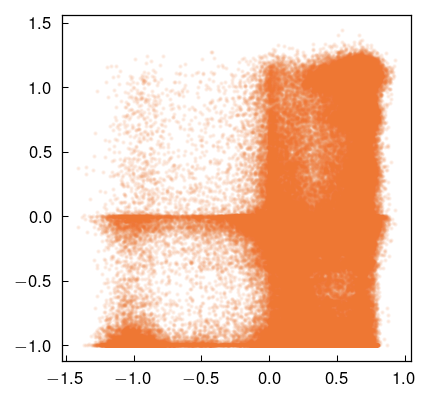

In [84]:
plt.plot(np.concatenate(c_green)[::100], np.concatenate(c_blue)[::100], '.', alpha=0.1)

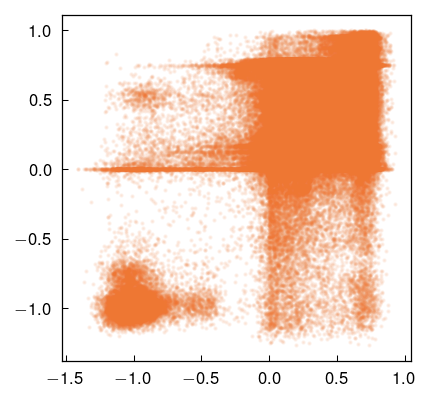

In [85]:
plt.plot(np.concatenate(c_green)[::100], np.concatenate(c_orange)[::100], '.', alpha=0.1)

In [86]:
n_cis = np.sum((np.abs(omegas[..., 3:]) <= (np.pi / 2.0)).astype(int), axis=-1)
p63_cis = (np.abs(omegas[..., 3]) <= (np.pi / 2.0)).astype(int)
p70_cis = (np.abs(omegas[..., 4]) <= (np.pi / 2.0)).astype(int)
p71_cis = (np.abs(omegas[..., 5]) <= (np.pi / 2.0)).astype(int)
p72_cis = (np.abs(omegas[..., 6]) <= (np.pi / 2.0)).astype(int)

In [88]:
for i in range(3, 7):
    p = (np.abs(omegas[..., i]) <= (np.pi / 2.0)).astype(int)
    print(np.count_nonzero(p) / np.prod(p.shape) * 100) 

6.04877467227419
5.427688057145693
6.123181120990637
1.4471859516983498


(array([1.4634856e+07, 8.8580400e+05, 5.0126600e+05, 3.3868200e+05,
        2.6064800e+05, 2.0911600e+05, 1.7298800e+05, 1.5349200e+05,
        1.5819600e+05, 1.7767900e+05, 1.9652200e+05, 1.9410900e+05,
        1.6970700e+05, 1.4665300e+05, 1.3091400e+05, 1.2031400e+05,
        1.1326400e+05, 1.0747000e+05, 1.0422500e+05, 1.1158200e+05,
        1.4332900e+05, 2.1383700e+05, 2.9480500e+05, 3.2146400e+05,
        2.7541500e+05, 2.0540800e+05, 1.4941100e+05, 1.1954600e+05,
        1.1835800e+05, 1.5789300e+05, 2.5352300e+05, 3.9668800e+05,
        5.0158400e+05, 4.8144200e+05, 3.4331100e+05, 1.8360300e+05,
        7.6807000e+04, 2.5941000e+04, 7.9290000e+03, 2.3210000e+03,
        6.9900000e+02, 2.1900000e+02, 6.6000000e+01, 2.8000000e+01,
        1.1000000e+01, 3.0000000e+00, 0.0000000e+00, 5.0000000e+00,
        4.0000000e+00, 1.0000000e+00]),
 array([0.        , 0.03356878, 0.06713757, 0.10070635, 0.13427514,
        0.16784391, 0.20141269, 0.23498148, 0.26855028, 0.30211905,
        

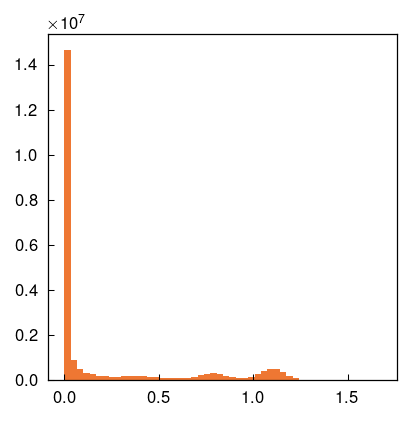

In [104]:
plt.hist(np.ravel(fs_qtots[:, 5]), bins=50)

# features for MSM building

In [108]:
import pyemma
from itertools import product

In [106]:
gs_file = "/project2/dinner/darrenjl/kaiB/03022023_restart_trans_gs/run_0/2qke_mutated.run.00.h5"
gs_traj = md.load(gs_file)

featurizer = pyemma.coordinates.featurizer(gs_traj.top)

/beagle3/dinner/scguo/envs/md/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [109]:
resids = np.array([3, 9, 11, 13, 16, 23, 33, 38, 41, 43, 45, 47, 51, 56, 59, 63, 65, 67, 70, 72, 75, 78, 81, 84, 87, 90, 93]) - 1
residue_pairs = [(i, j) for (i, j) in product(resids, resids) if abs(i - j) > 3 and i > j]
featurizer.add_residue_mindist(residue_pairs=residue_pairs, threshold=0.45)

print(np.count_nonzero(featurizer.describe()))

332


In [115]:
traj_files = []
for i in range(1, 12289):
    j = i // 1000
    for iso in ("cis", "trans"):
        head = f"{base_dir}/{j:02}/{i:05}/outputs/{i:05}_{iso}"
        listed = glob.glob(f"{base_dir}/{j:02}/{i:05}/{iso}/*.up")
        if len(listed) != 0:
            traj_files.extend(listed)

In [116]:
len(traj_files)

22826